# Week_2
---

### Import Librarys and Set Plot 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from func import *
%matplotlib inline

---
### Search for interested big data information

In [2]:
data = pd.read_csv('../../NTU_大數據與商業分析Datasets/Orders.csv', nrows = 3).T
data

,0,1,2
DateId,20150703,20150703,20150703
MemberId,1388133,1388133,1388133
OrderGroupCode,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...
TrackSourceTypeDef,Web,Web,Web
TrackDeviceTypeDef,Mobile,Mobile,Mobile
PayProfileTypeDef,SevenEleven,SevenEleven,SevenEleven
SalesOrderSlaveId,4457777,4457778,4457779
SalePageId,1242871,1242880,1242880
IsMajor,True,True,True
IsGift,False,False,False


---
### Import interested Values

In [3]:
data = pd.read_csv('../../NTU_大數據與商業分析Datasets/Orders.csv', index_col = False, #low_memory=False,
                   usecols = ['SalesOrderSlaveDateTime', 'SalesOrderSlaveTotalPayment'])\
                [['SalesOrderSlaveDateTime', 'SalesOrderSlaveTotalPayment']]
data.columns = ['Date', 'Payment']
data.head()

,Date,Payment
0,2015-07-03 07:30:02.007,350.0
1,2015-07-03 07:30:02.023,199.0
2,2015-07-03 07:30:02.040,199.0
3,2015-07-03 07:30:02.057,225.0
4,2015-07-03 07:33:01.600,100.0


---
### Add Date Columns for Web Crawler

In [4]:
data.insert(1, 'Year', pd.DatetimeIndex(data['Date']).year.astype('int'))
data.insert(2, 'Month', pd.DatetimeIndex(data['Date']).month.astype('int'))
data.head()

,Date,Year,Month,Payment
0,2015-07-03 07:30:02.007,2015,7,350.0
1,2015-07-03 07:30:02.023,2015,7,199.0
2,2015-07-03 07:30:02.040,2015,7,199.0
3,2015-07-03 07:30:02.057,2015,7,225.0
4,2015-07-03 07:33:01.600,2015,7,100.0


In [5]:
group = data.groupby(['Year', 'Month']).sum()
group.head()

Payment
Year Month            
2015 5       1088629.0
     6       7806371.0
     7      13328028.0
     8       8427733.0
     9      17764823.0

In [6]:
oldest = group.iloc[0].name
oldest

(2015, 5)

In [7]:
CPI_info = getCPI(str(oldest[0]) + '-' + str(oldest[1]).zfill(2))
CPI_info.head()

,Year,Month,CPI (%),WPI (%)
0,107,8,1.53,6.83
1,107,7,1.75,7.02
2,107,6,1.31,6.65
3,107,5,1.64,5.61
4,107,4,1.98,2.53


---
### Match data

In [8]:
dataind = 0
appind = []
for i in range(len(CPI_info)-1, -1, -1):
    if group.iloc[dataind].name[0]==CPI_info.loc[i, 'Year']+1911:
        if group.iloc[dataind].name[1]==CPI_info.loc[i, 'Month']:
            appind.append(i)
            dataind += 1
            if(dataind==len(group)): break

---
### Adjust data for analysis

In [9]:
CPI_info['CPI (%)'] = pd.to_numeric(CPI_info['CPI (%)'])
CPI_info['WPI (%)'] = pd.to_numeric(CPI_info['WPI (%)'])
CPI_info['Date'] = CPI_info['Year'].astype('str') + '-' + CPI_info['Month'].astype('str').apply(lambda x: x.zfill(2))
CPI_info.head()

,Year,Month,CPI (%),WPI (%),Date
0,107,8,1.53,6.83,107-08
1,107,7,1.75,7.02,107-07
2,107,6,1.31,6.65,107-06
3,107,5,1.64,5.61,107-05
4,107,4,1.98,2.53,107-04


---
### CPI v.s. Year/Month

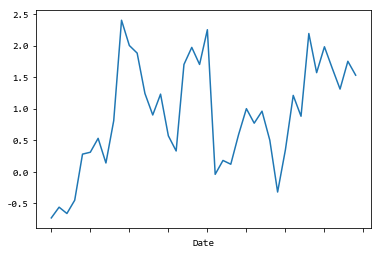

In [10]:
CPI_info.groupby('Date')['CPI (%)'].sum().plot()

###  Payment v.s. CPI
* 物價漲比較高時 (~2.4 %) 以及 物價跌時 (<0 %) 整體的購買力比較低，約在 1~2e7 元
* 物價漲約 1.0 % 時，整體購買力平均約在 4~5e7 元

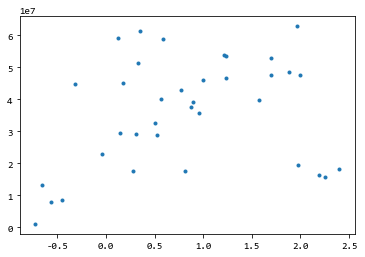

In [11]:
plt.plot(CPI_info.loc[appind, 'CPI (%)'], group.Payment, '.')

### Payment v.s. WPI

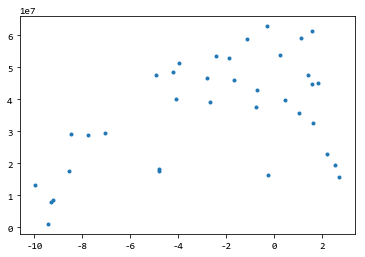

In [12]:
plt.plot(CPI_info.loc[appind, 'WPI (%)'], group.Payment, '.')